## Prepare

In [262]:
import pandas as pd
from tabulate import tabulate
from scipy.stats import trim_mean
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sb
path = "D:\\Kadir\\Codes\\kdr_data_science_py\\data\\"

In [263]:
state = pd.read_csv(path + "\\state.csv")
dfw = pd.read_csv(path + "\\dfw_airline.csv")
sp500_px = pd.read_csv(path + "\\sp500_px.csv")
sp500_sym = pd.read_csv(path + "\\sp500_sym.csv")
kc_tax = pd.read_csv(path + "\\kc_tax.csv")
lc_loans = pd.read_csv(path + "\\lc_loans.csv")
airline_stats = pd.read_csv(path + "\\airline_stats.csv")
airline_stats["airline"] = pd.Categorical(airline_stats["airline"], categories=["Alaska", "American", "Jet Blue", "Delta", "United", "Southwest"], ordered=True)

## 1.1

### Visualize data with tabulate (ascii in R)

In [264]:
state_asc = state.copy()
# To avoid commas
state_asc["Population"] = state_asc["Population"].apply(lambda x: '{:,}'.format(x))

# Subset the first 8 rows of the DataFrame
subset_state_asc = state_asc.iloc[0:8, :]

# Formatting options
digits = [0, 0, 1]
align = ['l', 'l', 'r', 'r']
caption = "A few rows of the +data.frame state+ of population and murder rate by state."

# Convert DataFrame to a list of lists for tabulate
data_list = [subset_state_asc.columns.tolist()] + subset_state_asc.astype(str).values.tolist()

# Print the ASCII table
print(tabulate(data_list, headers='firstrow', tablefmt='grid', numalign=align, stralign=align, floatfmt=".1f"))
print(caption)

+-------------+--------------+---------------+----------------+
|       State |   Population |   Murder.Rate |   Abbreviation |
+=============+==============+===============+================+
| Alabama     | 4,779,736    | 5.7           | AL             |
+-------------+--------------+---------------+----------------+
| Alaska      | 710,231      | 5.6           | AK             |
+-------------+--------------+---------------+----------------+
| Arizona     | 6,392,017    | 4.7           | AZ             |
+-------------+--------------+---------------+----------------+
| Arkansas    | 2,915,918    | 5.6           | AR             |
+-------------+--------------+---------------+----------------+
| California  | 37,253,956   | 4.4           | CA             |
+-------------+--------------+---------------+----------------+
| Colorado    | 5,029,196    | 2.8           | CO             |
+-------------+--------------+---------------+----------------+
| Connecticut | 3,574,097    | 2.4      

### Mean - Trimmed Mean - Median

In [265]:
state["Population"].mean()

6162876.3

In [266]:
trim_mean(state["Population"], proportiontocut=0.1)

4783697.125

In [267]:
state["Population"].median()

4436369.5

### Mean - Weighted Mean

In [268]:
state["Murder.Rate"].mean()

4.066

In [269]:
np.average(state["Murder.Rate"], weights=state["Population"])

4.445833981123393

## 1.2

### Standart deviation - Interquartile Range - Mean Absolute Deviation

In [270]:
state["Population"].std()

6848235.347401142

In [271]:
population_iqr = state["Population"].quantile(0.75) - state["Population"].quantile(0.25)
population_iqr

4847308.0

In [272]:
# state["Population"].mad() - deprecated
np.mean(np.abs(state["Population"] - state["Population"].mean()))

4450933.356000001

## 1.3

### Quantile

In [273]:
state["Murder.Rate"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

### Percentile Table

In [274]:
quantiles = state["Murder.Rate"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
quantiles_df = pd.DataFrame(quantiles).T

# Formatting options
digits = [2, 2, 2, 2, 2]
align = ['r', 'r', 'r', 'r', 'r']
caption = "Percentiles of murder rate by state."

# Convert DataFrame to a list of lists for tabulate
data_list = [quantiles_df.columns.tolist()] + quantiles_df.values.tolist()
print(tabulate(data_list, headers='firstrow', tablefmt='grid', numalign=align, stralign=align, floatfmt=".2f"))
print(caption)

+--------+--------+-------+--------+--------+
|   0.05 |   0.25 |   0.5 |   0.75 |   0.95 |
+========+========+=======+========+========+
| 1.60   | 2.42   | 4.00  | 5.55   | 6.51   |
+--------+--------+-------+--------+--------+
Percentiles of murder rate by state.


### Box Plot

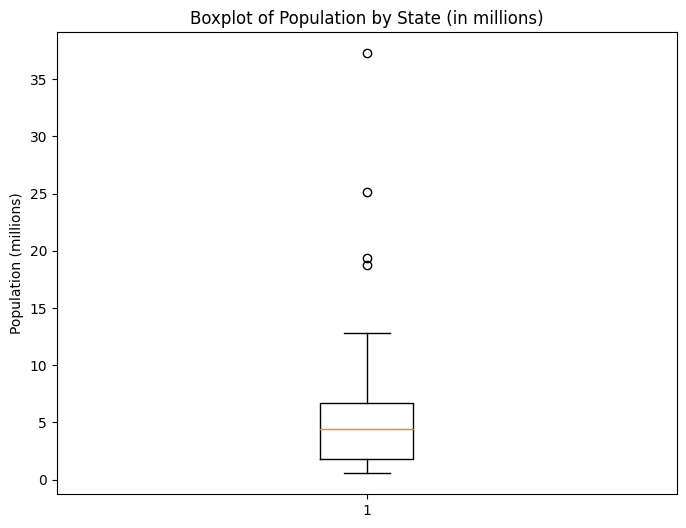

In [275]:
state["Population (millions)"] = state["Population"] / 1000000

# Create a boxplot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(state["Population (millions)"])
plt.ylabel("Population (millions)")
plt.title("Boxplot of Population by State (in millions)")
plt.show()

### Frequency Table

In [276]:
# Assuming state is a pandas DataFrame
breaks = np.linspace(state["Population"].min(), state["Population"].max(), num=11)
pop_freq = pd.cut(state["Population"], bins=breaks, right=True, include_lowest=True)

state["PopFreq"] = pop_freq

# Create the frequency table
pop_table = state.groupby("PopFreq").size().reset_index(name="Count")
pop_table["BinNumber"] = np.arange(1, 11)
pop_table["BinRange"] = pop_table["PopFreq"].astype(str).str.replace(", ", "-").str.replace("(", "").str.replace("]", "")

# Retrieve the states for each bin
state_abb = state.groupby("PopFreq")["Abbreviation"].apply(", ".join).reset_index(name="States")
pop_table = pop_table.merge(state_abb, on="PopFreq", how="left")
pop_table = pop_table[["BinNumber", "BinRange", "Count", "States"]]

# Print the ASCII table
print(tabulate(pop_table, headers="keys", tablefmt="grid", showindex=False, numalign="left", stralign="right", disable_numparse=True))

+-------------+-----------------------+---------+------------------------------------------------------------------------------------------------+
|   BinNumber |              BinRange |   Count |                                                                                         States |
+=============+=======================+=========+================================================================================================+
|           1 |  563625.999-4232659.0 |      24 | AK, AR, CT, DE, HI, ID, IA, KS, ME, MS, MT, NE, NV, NH, NM, ND, OK, OR, RI, SD, UT, VT, WV, WY |
+-------------+-----------------------+---------+------------------------------------------------------------------------------------------------+
|           2 |   4232659.0-7901692.0 |      14 |                                         AL, AZ, CO, IN, KY, LA, MD, MA, MN, MO, SC, TN, WA, WI |
+-------------+-----------------------+---------+---------------------------------------------------------------------

C:\Users\kdrer\AppData\Local\Temp\ipykernel_12536\51370607.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pop_table["BinRange"] = pop_table["PopFreq"].astype(str).str.replace(", ", "-").str.replace("(", "").str.replace("]", "")


### Histogram

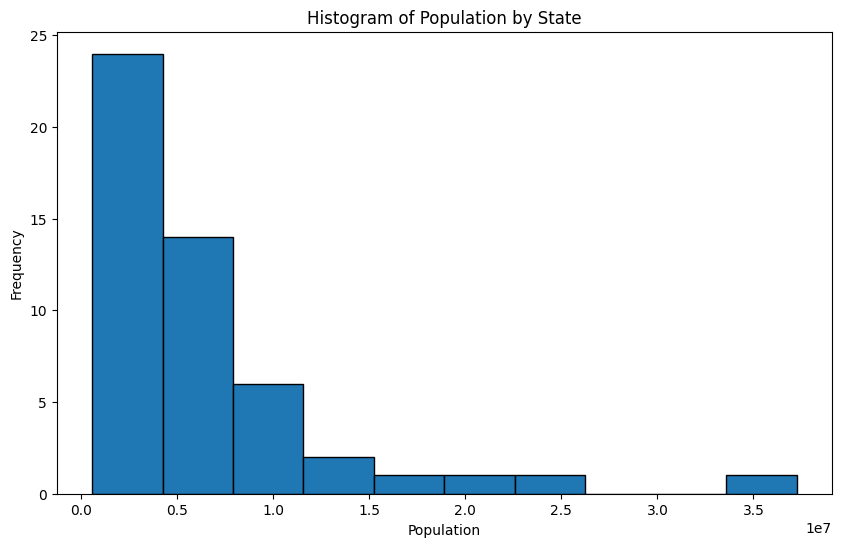

In [277]:
breaks = np.linspace(state["Population"].min(), state["Population"].max(), num=11)

# Create the histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(state["Population"], bins=breaks, edgecolor='black')
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.title("Histogram of Population by State")
plt.show()

### Density Plot

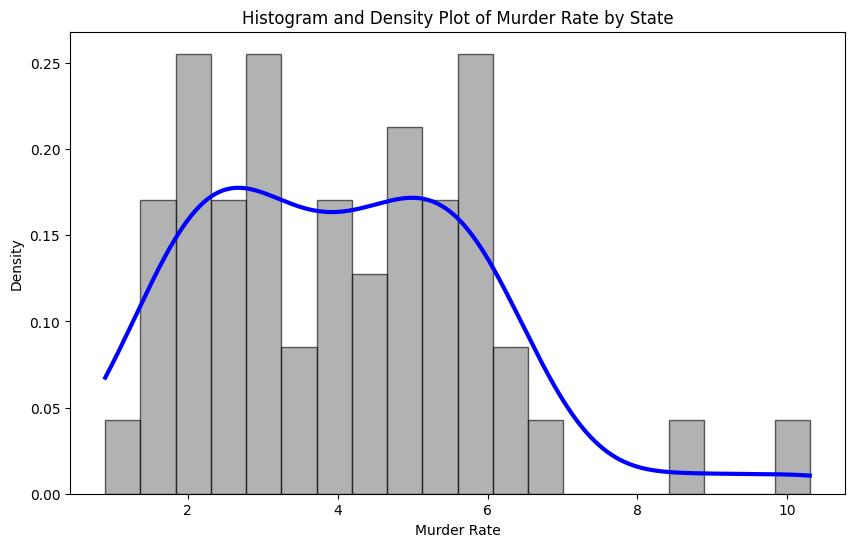

In [278]:
# Assuming state is a pandas DataFrame
murder_rate_series = state["Murder.Rate"]

# Create the histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(murder_rate_series, density=True, bins=20, alpha=0.6, color="gray", edgecolor='black')
plt.xlabel("Murder Rate")
plt.ylabel("Density")
plt.title("Histogram and Density Plot of Murder Rate by State")

# Calculate KDE for density plot
density = stats.gaussian_kde(murder_rate_series)
x_vals = np.linspace(murder_rate_series.min(), murder_rate_series.max(), 1000)
plt.plot(x_vals, density(x_vals), linewidth=3, color="blue")

plt.show()

# 1.4

### Airport Delays Table

In [279]:
# Assuming dfw is a pandas DataFrame containing the delays by cause
# Calculate the percentage of delays by cause
percentage_delays = 100 * dfw / dfw.sum().sum()

# Convert DataFrame to a matrix and create the ASCII table
ascii_table = percentage_delays.to_numpy()
column_names = percentage_delays.columns.tolist()

# Formatting options
digits = [2, 2, 2, 2, 2]
align = ['r'] * len(column_names)
caption = "Percentage of delays by cause at Dallas-Ft. Worth airport."

# Print the ASCII table
print(tabulate(ascii_table, headers=column_names, tablefmt="grid", numalign=align, stralign=align, floatfmt=".2f"))
print(caption)

+-----------+-------+-----------+------------+-----------+
|   Carrier |   ATC |   Weather |   Security |   Inbound |
+===========+=======+===========+============+===========+
| 23.02     | 30.40 | 4.03      | 0.12       | 42.43     |
+-----------+-------+-----------+------------+-----------+
Percentage of delays by cause at Dallas-Ft. Worth airport.


### Bar Plot of Delays

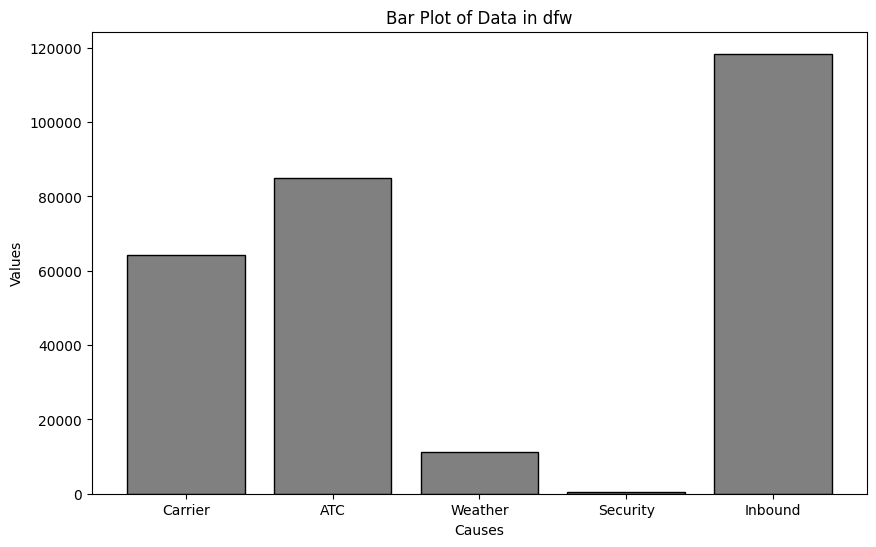

In [280]:
# Assuming dfw is a pandas DataFrame containing the delays by cause
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(dfw.iloc[0].index, dfw.iloc[0].values, color="gray", edgecolor="black")

# Set axis labels and title
plt.xlabel("Causes")
plt.ylabel("Values")
plt.title("Bar Plot of Data in dfw")

plt.show()

### Pie Chart of Delays

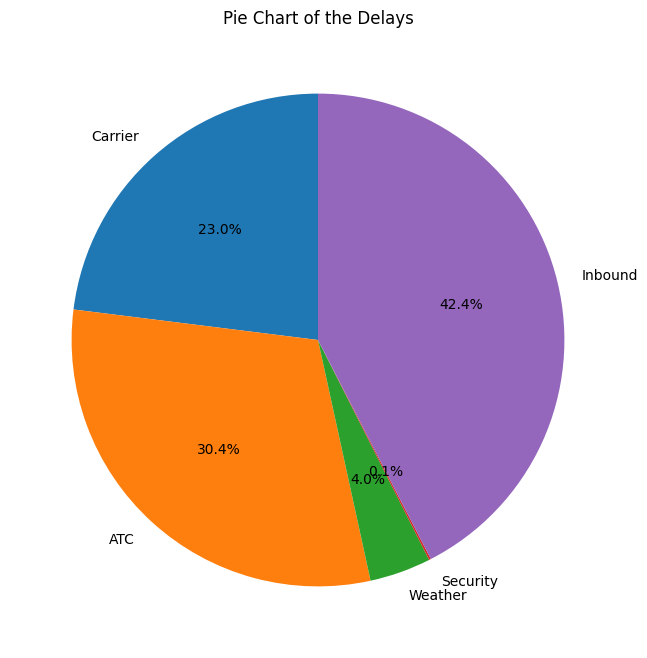

In [281]:
# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the pie chart
plt.pie(dfw.iloc[0].values, labels=dfw.iloc[0].index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of the Delays")

plt.show()

# 1.5

### Correlation Table of Telecommunications Services in SP500

In [282]:
# Select telecommunications_services sector symbols
telecom_symbols = sp500_sym.loc[sp500_sym['sector'] == "telecommunications_services", 'symbol'].tolist()

# Extract telecommunications_services sector stock data from sp500_px
telecom = sp500_px[telecom_symbols]

# Calculate correlation matrix
telecom_cor = telecom.corr()

# Format the correlation matrix to have 3 decimal places
telecom_cor_formatted = telecom_cor.round(3)

# Convert the DataFrame to an ASCII table
table = tabulate(telecom_cor_formatted, headers='keys', tablefmt='grid', floatfmt=".3f")

# Add caption to the table
caption = "Correlation between telecommunication stock returns.\n"
table_with_caption = caption + table

# Print the table
print(table_with_caption)

Correlation between telecommunication stock returns.
+------+-------+-------+-------+-------+--------+
|      |     T |   CTL |   FTR |    VZ |   LVLT |
+======+=======+=======+=======+=======+========+
| T    | 1.000 | 0.406 | 0.283 | 0.617 |  0.062 |
+------+-------+-------+-------+-------+--------+
| CTL  | 0.406 | 1.000 | 0.378 | 0.386 |  0.055 |
+------+-------+-------+-------+-------+--------+
| FTR  | 0.283 | 0.378 | 1.000 | 0.289 |  0.067 |
+------+-------+-------+-------+-------+--------+
| VZ   | 0.617 | 0.386 | 0.289 | 1.000 |  0.046 |
+------+-------+-------+-------+-------+--------+
| LVLT | 0.062 | 0.055 | 0.067 | 0.046 |  1.000 |
+------+-------+-------+-------+-------+--------+


### Correlation Plot

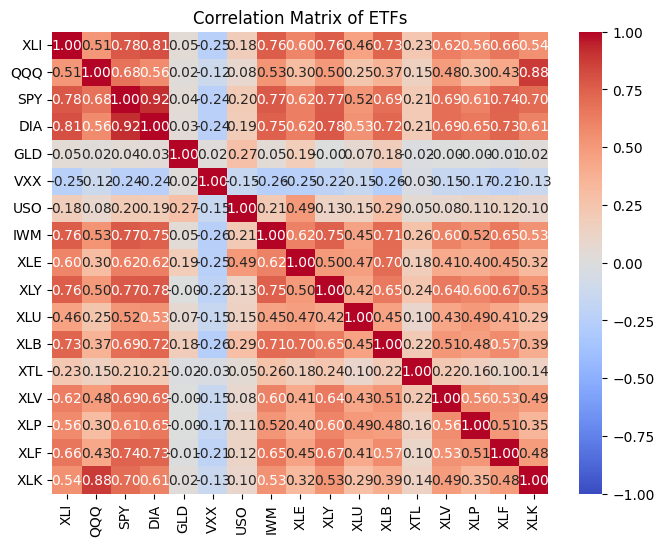

In [284]:
# Filter ETF symbols after "2012-07-01"
# Get ETF symbols from sp500_sym DataFrame
etf_symbols = sp500_sym.loc[sp500_sym['sector'] == "etf", 'symbol'].tolist()

# Extract ETF price data from sp500_px DataFrame
etfs = sp500_px[etf_symbols]
# Calculate correlation matrix
corr_matrix = etfs.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of ETFs")
plt.show()

### Scatter Plot

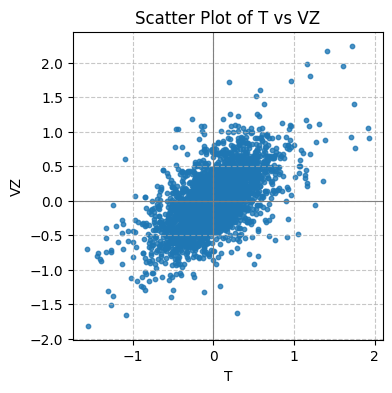

In [287]:
# Create the scatter plot
plt.figure(figsize=(4, 4))  # Set the size of the plot
plt.scatter(telecom['T'], telecom['VZ'], s=10, alpha=0.8)  # s is marker size, alpha is transparency

# Set axis labels and title
plt.xlabel("T")
plt.ylabel("VZ")
plt.title("Scatter Plot of T vs VZ")

# Add grid lines
plt.grid(True, linestyle="--", alpha=0.7)

# Add horizontal and vertical lines at 0
plt.axhline(0, color="grey", linewidth=0.8)
plt.axvline(0, color="grey", linewidth=0.8)

plt.show()

### Filter

In [288]:
# Filter the DataFrame based on the conditions
kc_tax0 = kc_tax[(kc_tax['TaxAssessedValue'] < 750000) & (kc_tax['SqFtTotLiving'] > 100) & (kc_tax['SqFtTotLiving'] < 3500)]

# Calculate the number of rows in the subset
num_rows = kc_tax0.shape[0]

print(num_rows)

432693


### Hexbin Plot

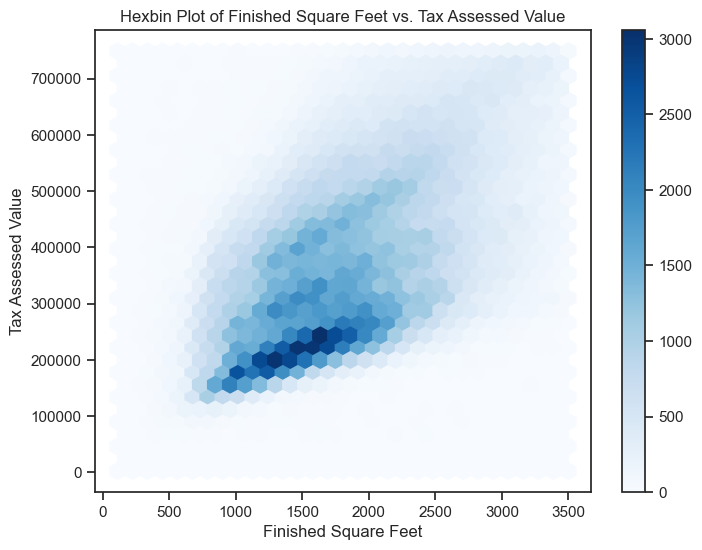

In [293]:
# Create the hexbin plot
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', data=kc_tax0, gridsize=30, cmap='Blues')

# Set axis labels and title
plt.xlabel("Finished Square Feet")
plt.ylabel("Tax Assessed Value")
plt.title("Hexbin Plot of Finished Square Feet vs. Tax Assessed Value")

# Add color bar
plt.colorbar()

plt.show()

### Box Plot of Daily % of Delayed Flights

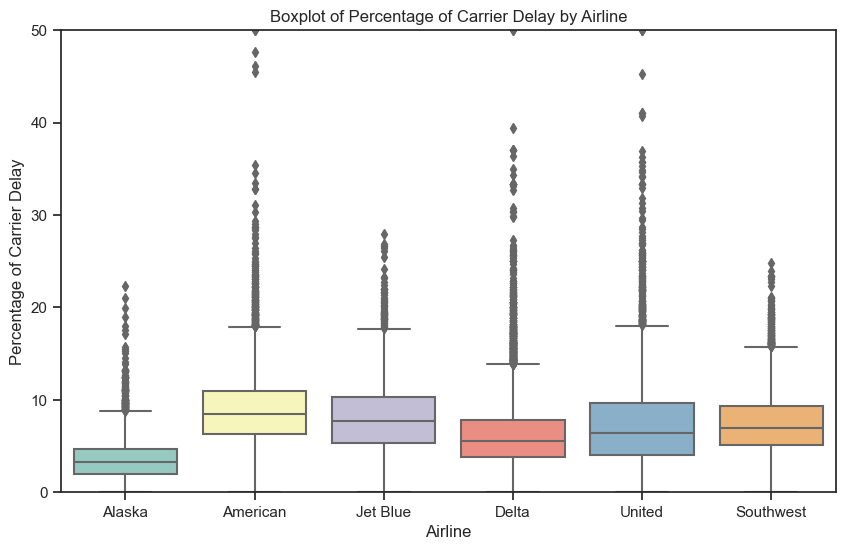

In [305]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sb.boxplot(x="airline", y="pct_carrier_delay", data=airline_stats, palette="Set3")

# Set y-axis limit
plt.ylim(0, 50)

# Set labels and title
plt.xlabel("Airline")
plt.ylabel("Percentage of Carrier Delay")
plt.title("Boxplot of Percentage of Carrier Delay by Airline")

plt.show()

### Violin Plot

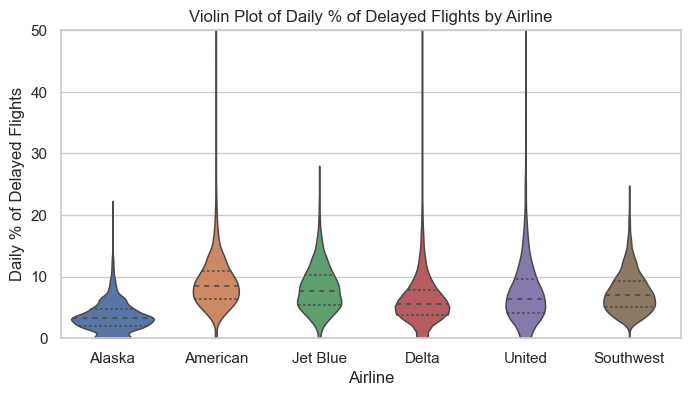

In [306]:
# Set the plot style
sb.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(8, 4))  # Set the size of the plot
sb.violinplot(x="airline", y="pct_carrier_delay", data=airline_stats, cut=0, inner="quart", linewidth=1.1)

# Set y-axis limit
plt.ylim(0, 50)

# Set labels and title
plt.xlabel("Airline")
plt.ylabel("Daily % of Delayed Flights")
plt.title("Violin Plot of Daily % of Delayed Flights by Airline")

# Save the plot as an image
plt.savefig('1.6.violin.png', dpi=300)

plt.show()

### Compare 4 Zip Codes's Tax Assessed Values

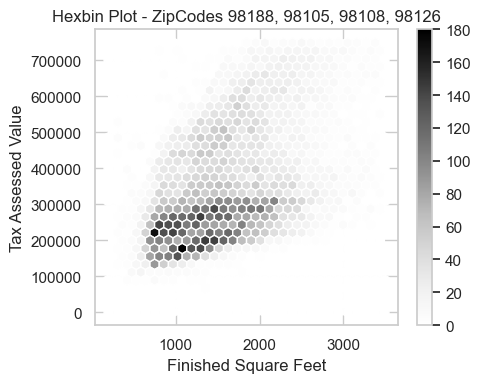

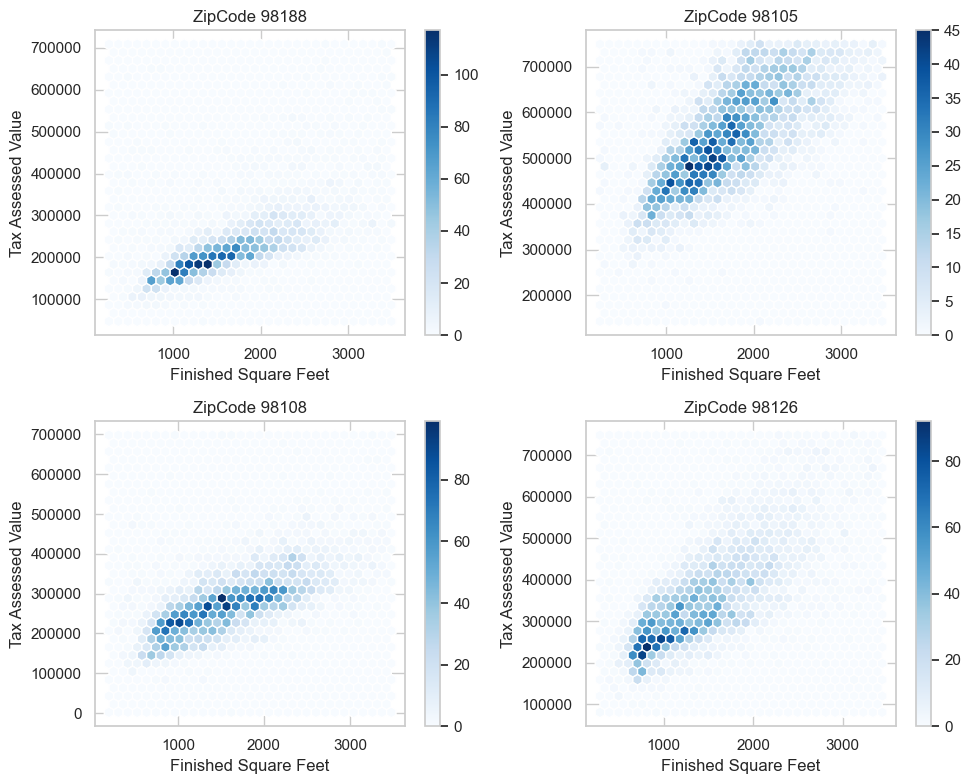

In [316]:
# Define the ZipCodes of interest
zip_codes = [98188, 98105, 98108, 98126]

# Subset the data based on the specified ZipCodes
subset_data = kc_tax0[kc_tax0['ZipCode'].isin(zip_codes)]

# Create the first plot
fig, ax = plt.subplots(figsize=(5, 4))
hb = ax.hexbin(subset_data['SqFtTotLiving'], subset_data['TaxAssessedValue'], gridsize=30, cmap='Greys', edgecolor='white')
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')
plt.colorbar(hb)
plt.title('Hexbin Plot - ZipCodes 98188, 98105, 98108, 98126')
plt.tight_layout()

plt.show()

# Create the second plot with facets
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for idx, zip_code in enumerate(zip_codes):
    ax = axes[idx // 2, idx % 2]
    data = subset_data[subset_data['ZipCode'] == zip_code]
    hb = ax.hexbin(data['SqFtTotLiving'], data['TaxAssessedValue'], gridsize=30, cmap='Blues', edgecolor='white')
    ax.set_xlabel('Finished Square Feet')
    ax.set_ylabel('Tax Assessed Value')
    ax.set_title(f'ZipCode {zip_code}')
    plt.colorbar(hb, ax=ax)

plt.tight_layout()
plt.show()